To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks below. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-resources/blob/master/clustering_module_solutions/2.solution_kmeans.ipynb).

1. Your task is to apply k-means to the _iris_ dataset and see what happens when you change the value of $k$. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this dataset? Play around a bit and write up your findings and your process. Keep in mind that you may find a solution with more than three clusters that nevertheless better tracks the real, trinary outcome. For example, two of those clusters may map to a single flower type, while the other two map to the other types.
1. In this assignment, you'll be working with the [heart disease dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.

> 1. Load the dataset from Thinkful's database. To connect to the database, use these credentials:
```
 postgres_user = 'dsbc_student'
 postgres_pw = '7*.8G9QH21'
 postgres_host = '142.93.121.174'
 postgres_port = '5432'
 postgres_db = 'heartdisease'
```
> 2. The dataset needs some preprocessing. So, before working with the dataset, apply the following code:
```
 # Define the features and the outcome
 X = heartdisease_df.iloc[:, :13]
 y = heartdisease_df.iloc[:, 13]

 # Replace missing values (marked by `?`) with a `0`
 X = X.replace(to_replace='?', value=0)

 # Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
 y = np.where(y > 0, 1, 0)
```
> Here, `X` will represent your features and `y` will hold the labels. If `y` is equal to `1`, that indicates that the corresponding patient has heart disease. And if `y` is equal to `0`, then the patient doesn't have heart disease.

> 3. Create a k-means solution that correctly assigns patients to heart disease diagnosis or no heart disease diagnosis clusters. Note that in this case, you actually know the correct number of clusters in the data (two). But you'll test whether k-means assigns observations as you expect it to. Because k-means is an unsupervised learning algorithm, it will be blind to whether or not the patients have heart disease.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine

# Iris Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the features.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [3]:
# We will fit k-means with k values equal to 2, 3, 4, 5, and 6:
cluster_numbers = [2, 3, 4, 5, 6]
kmeans_clusters = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters = i, random_state = 123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

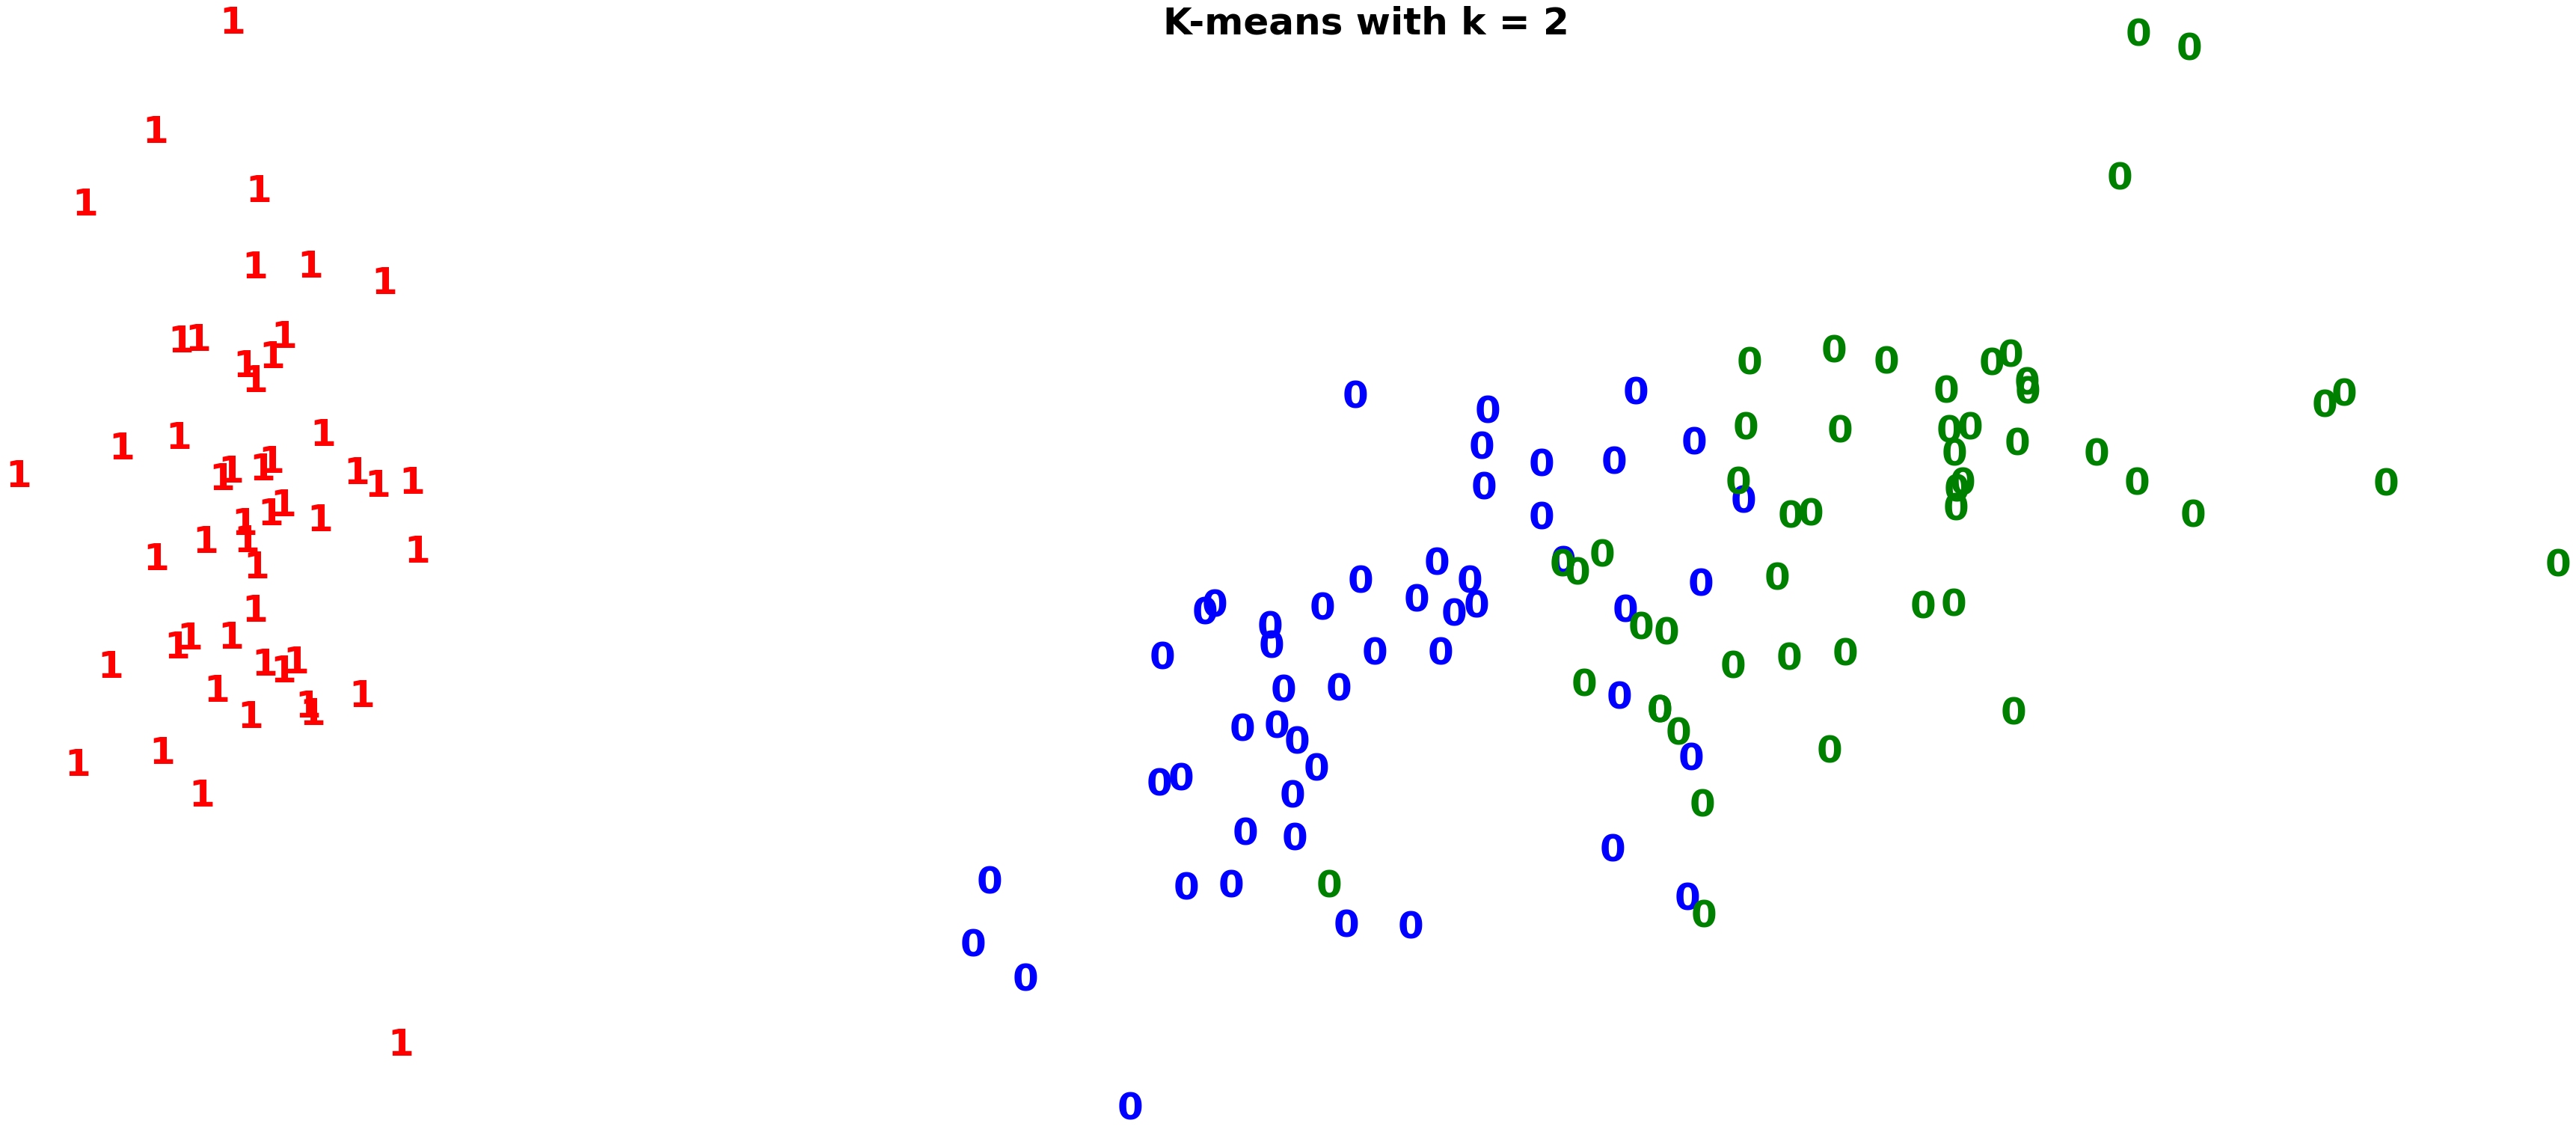

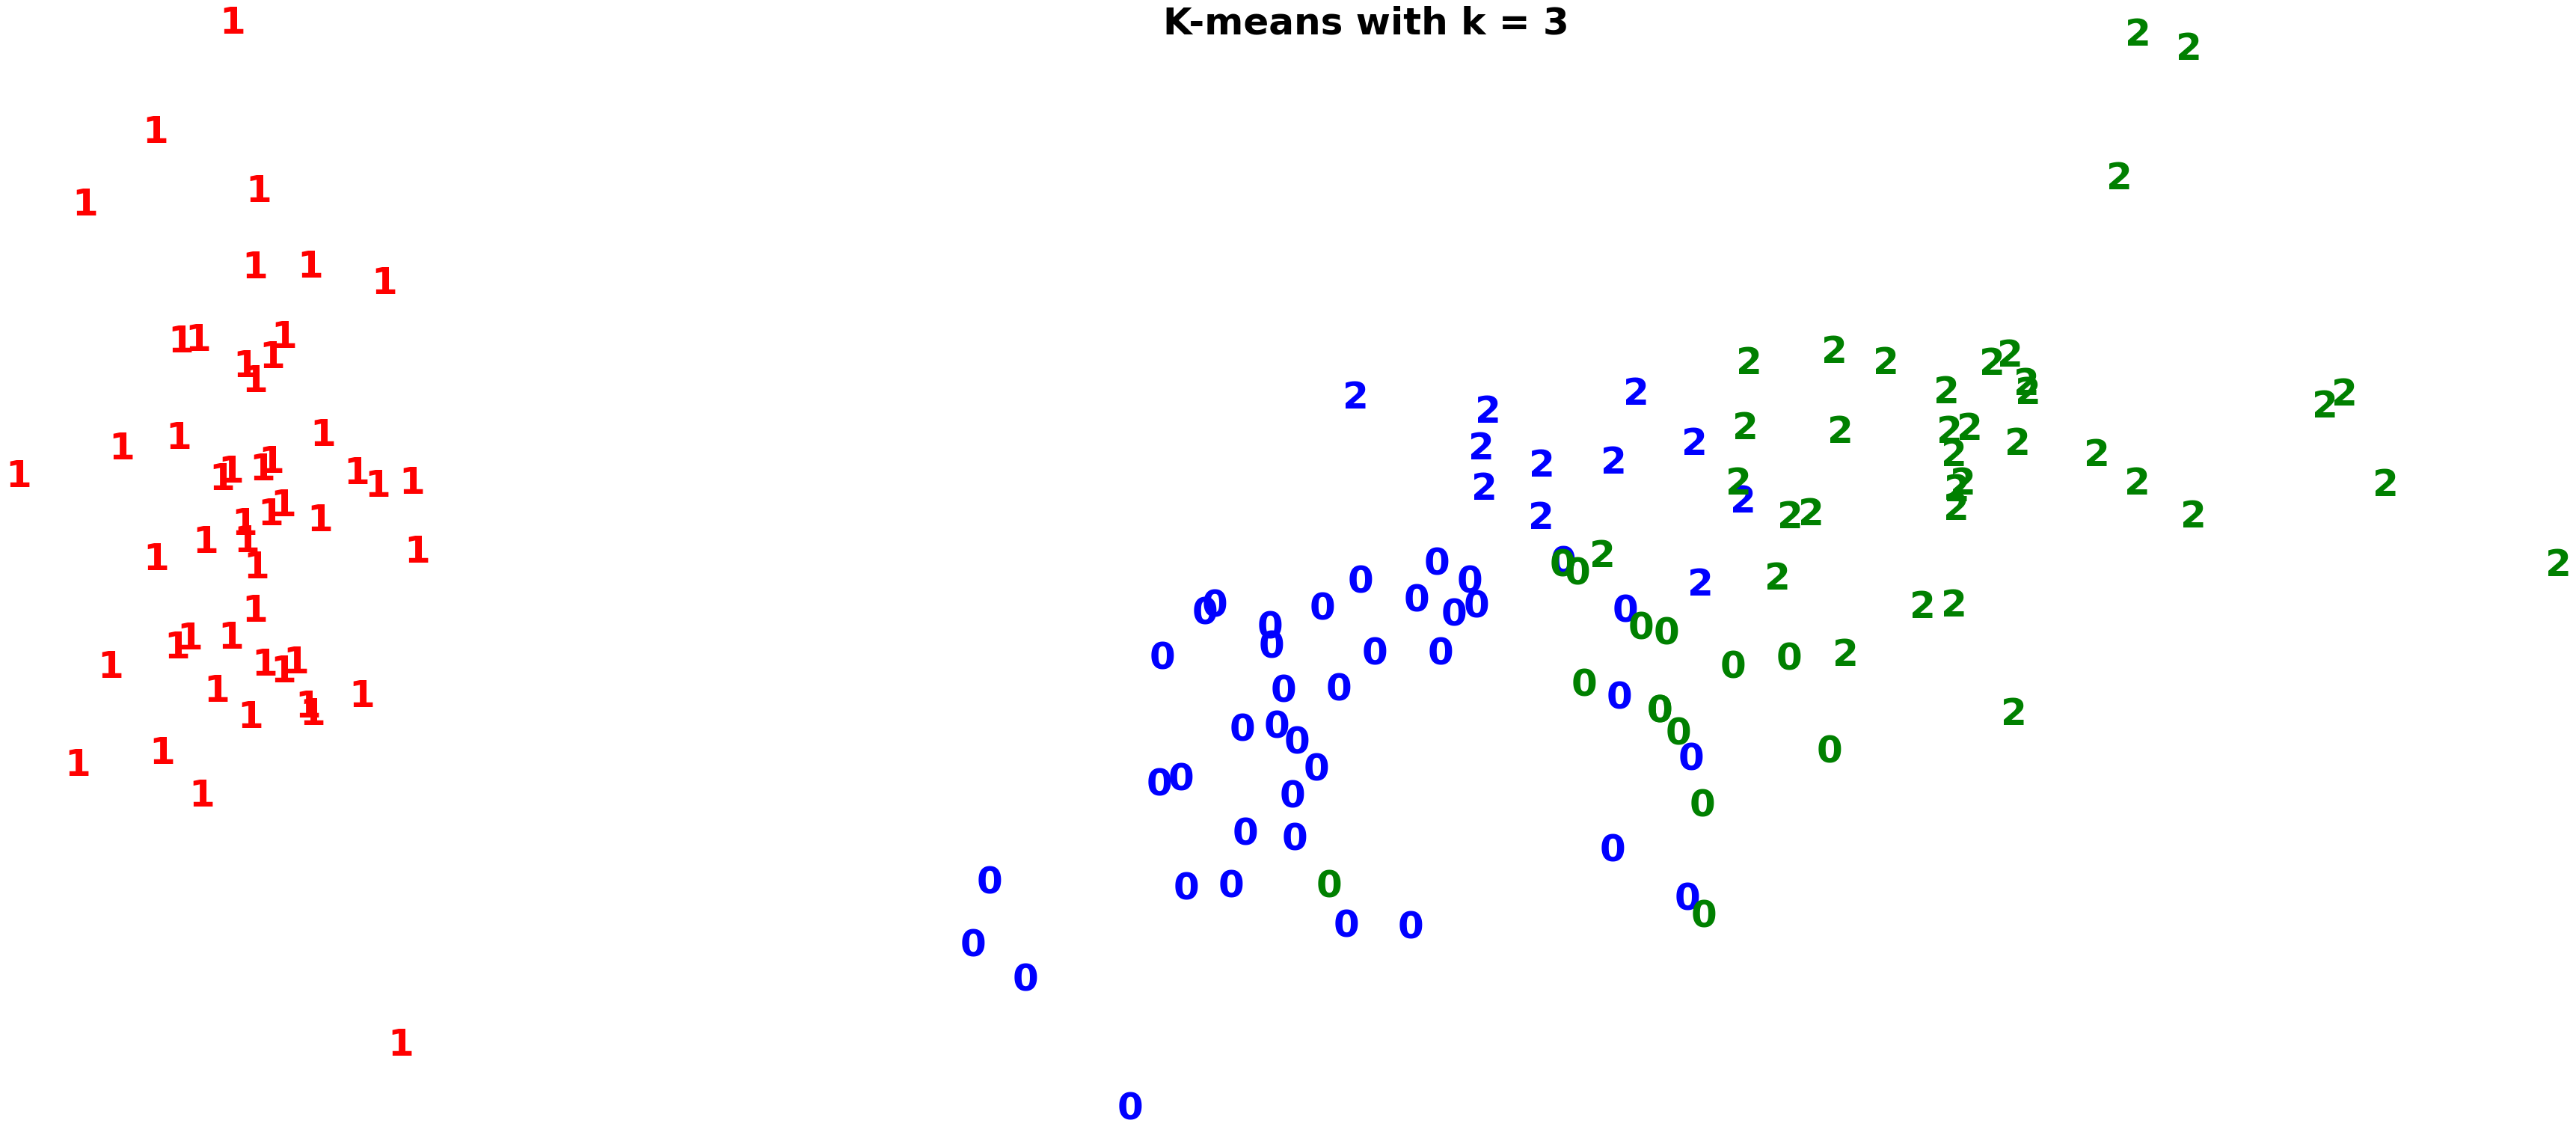

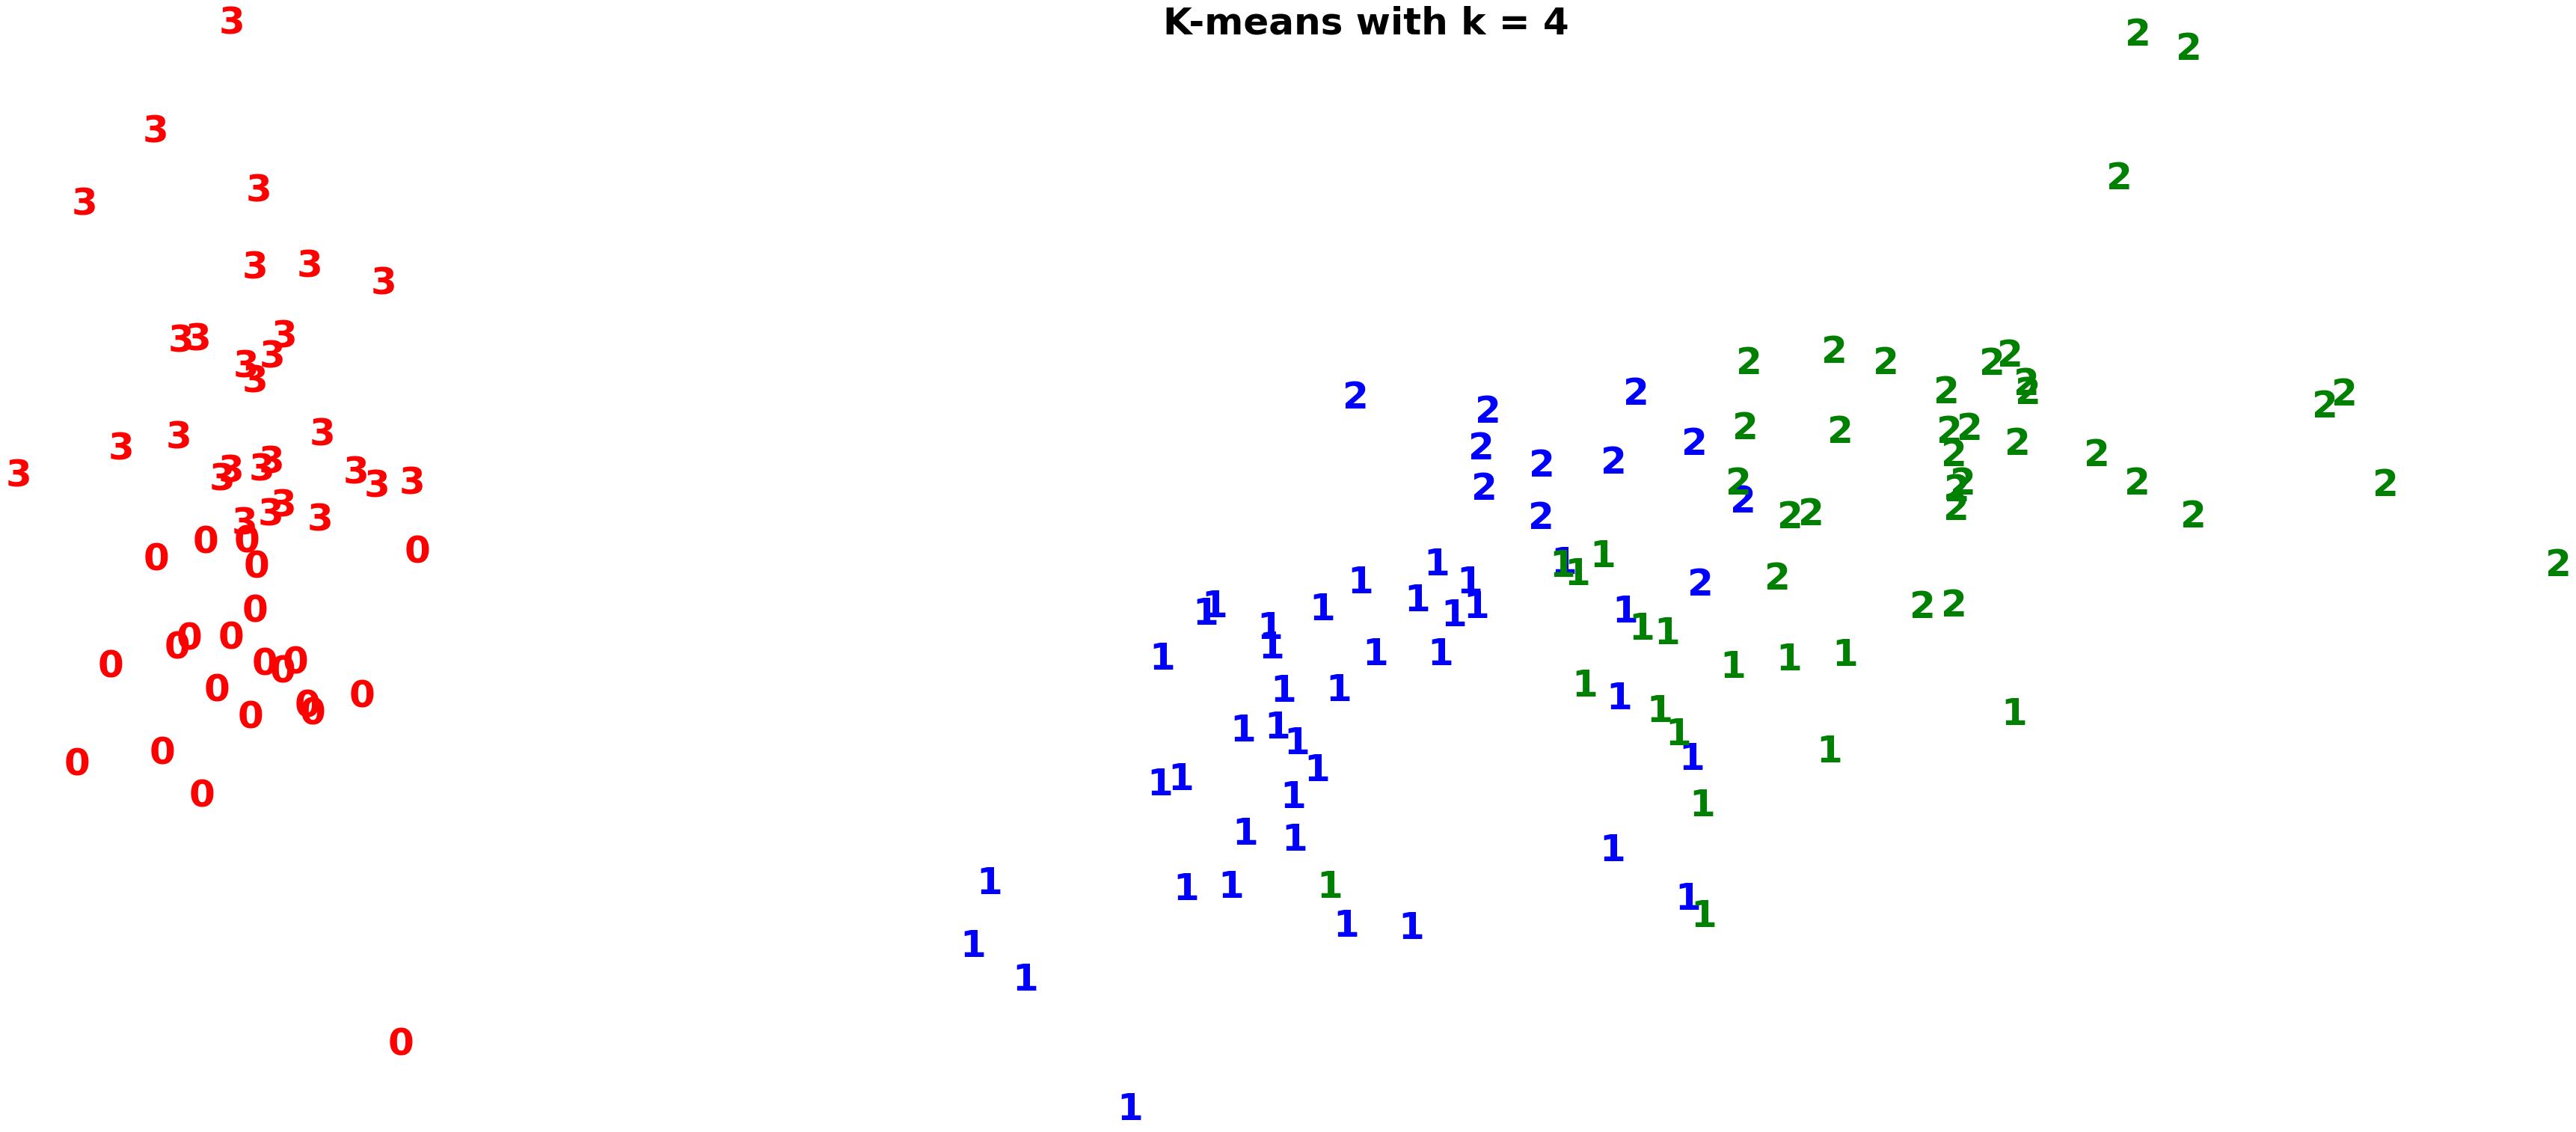

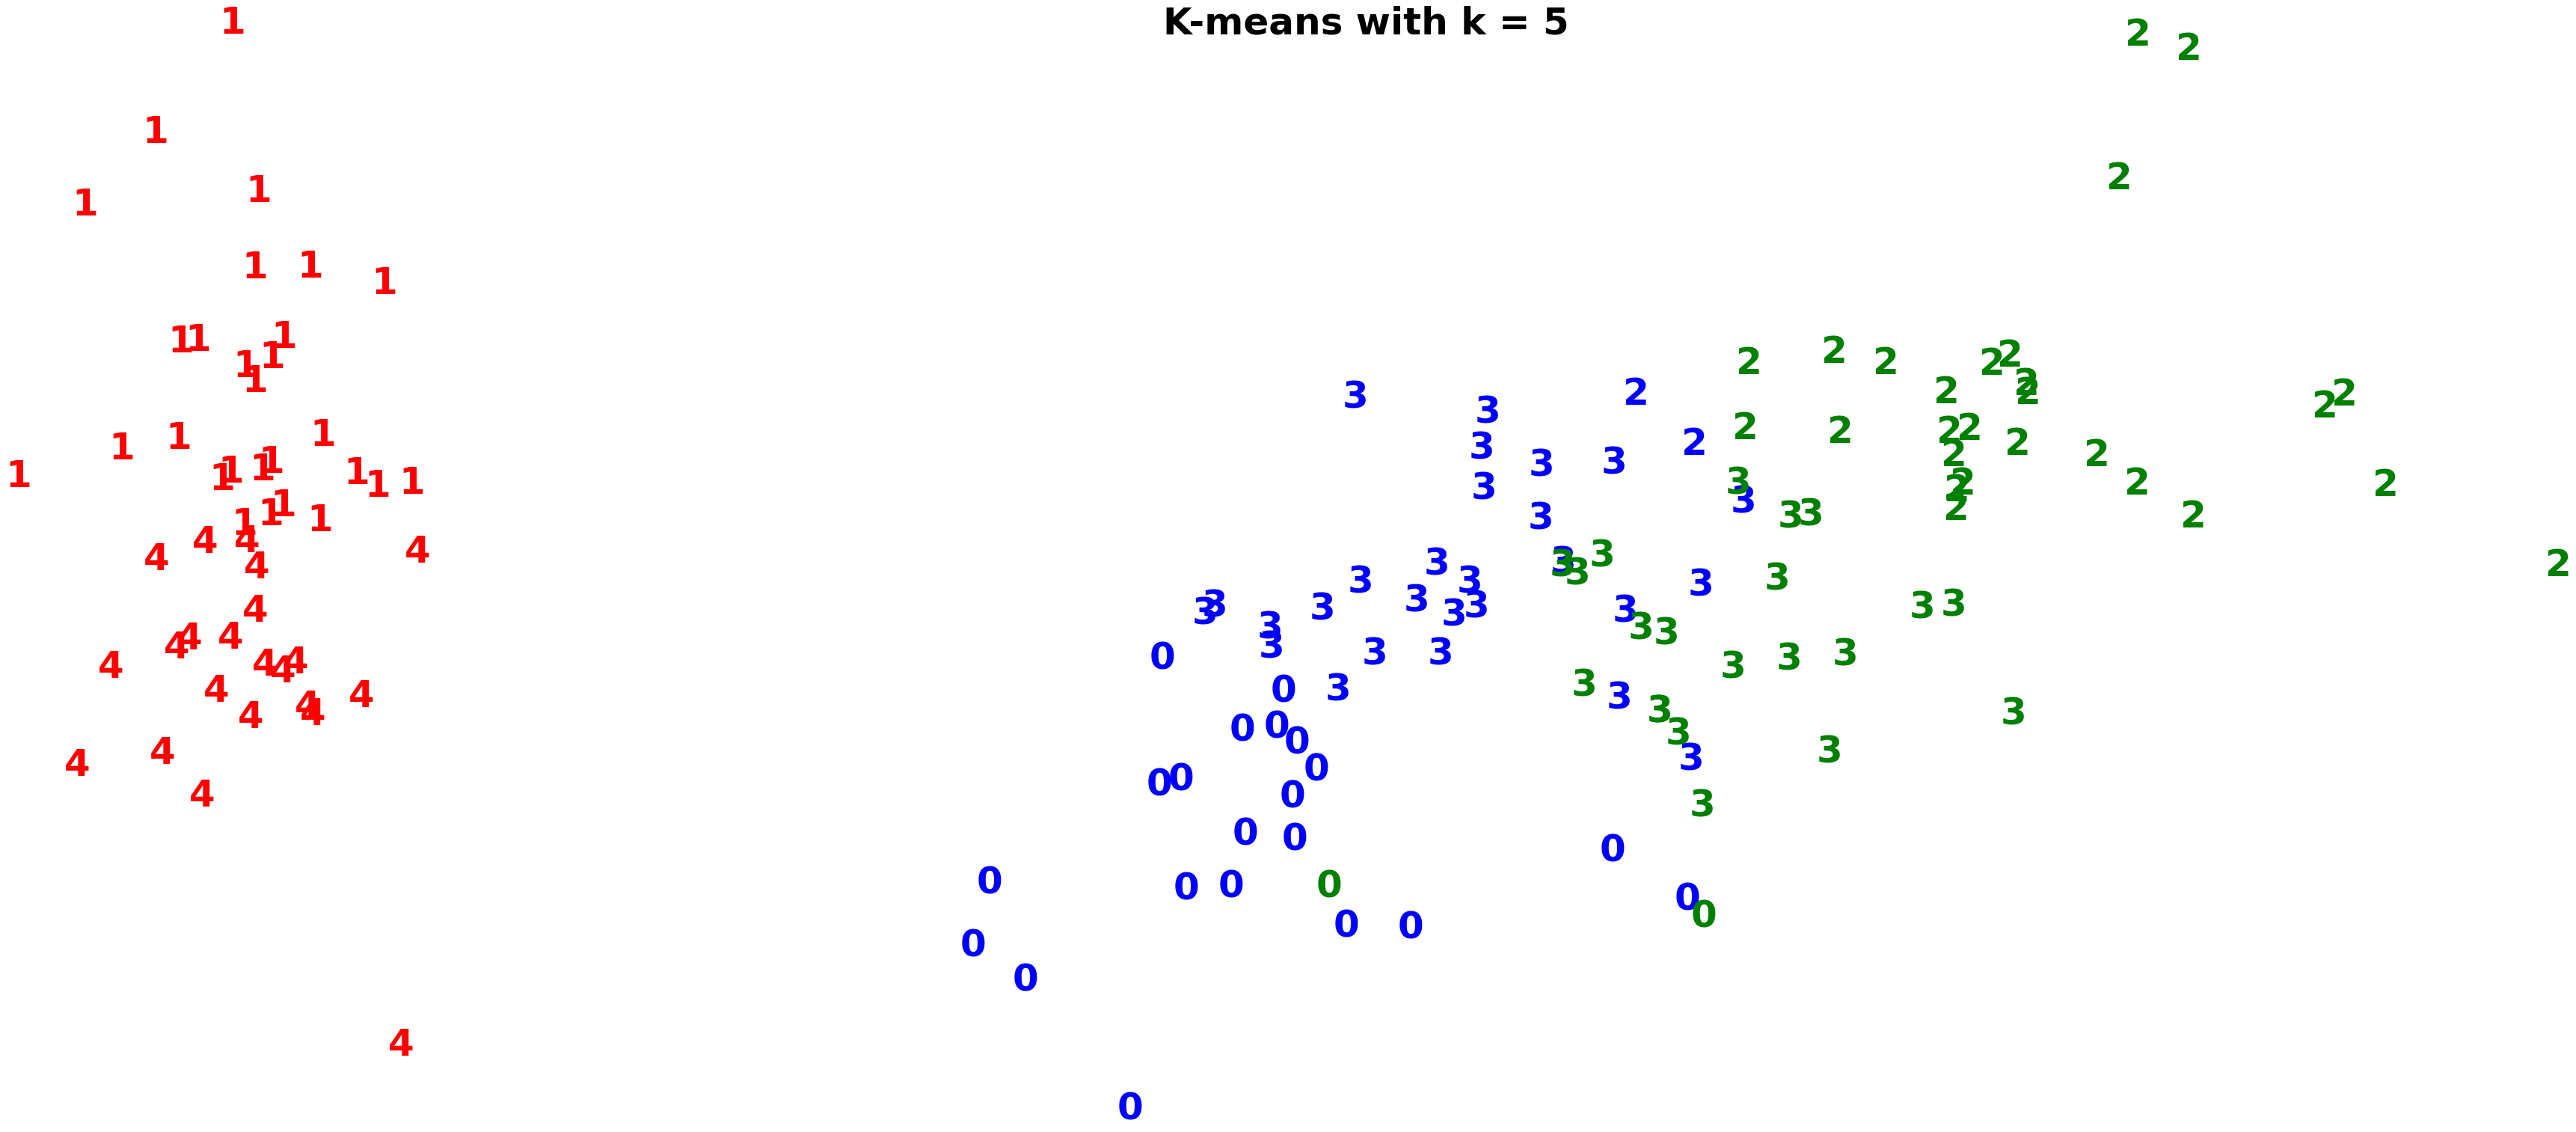

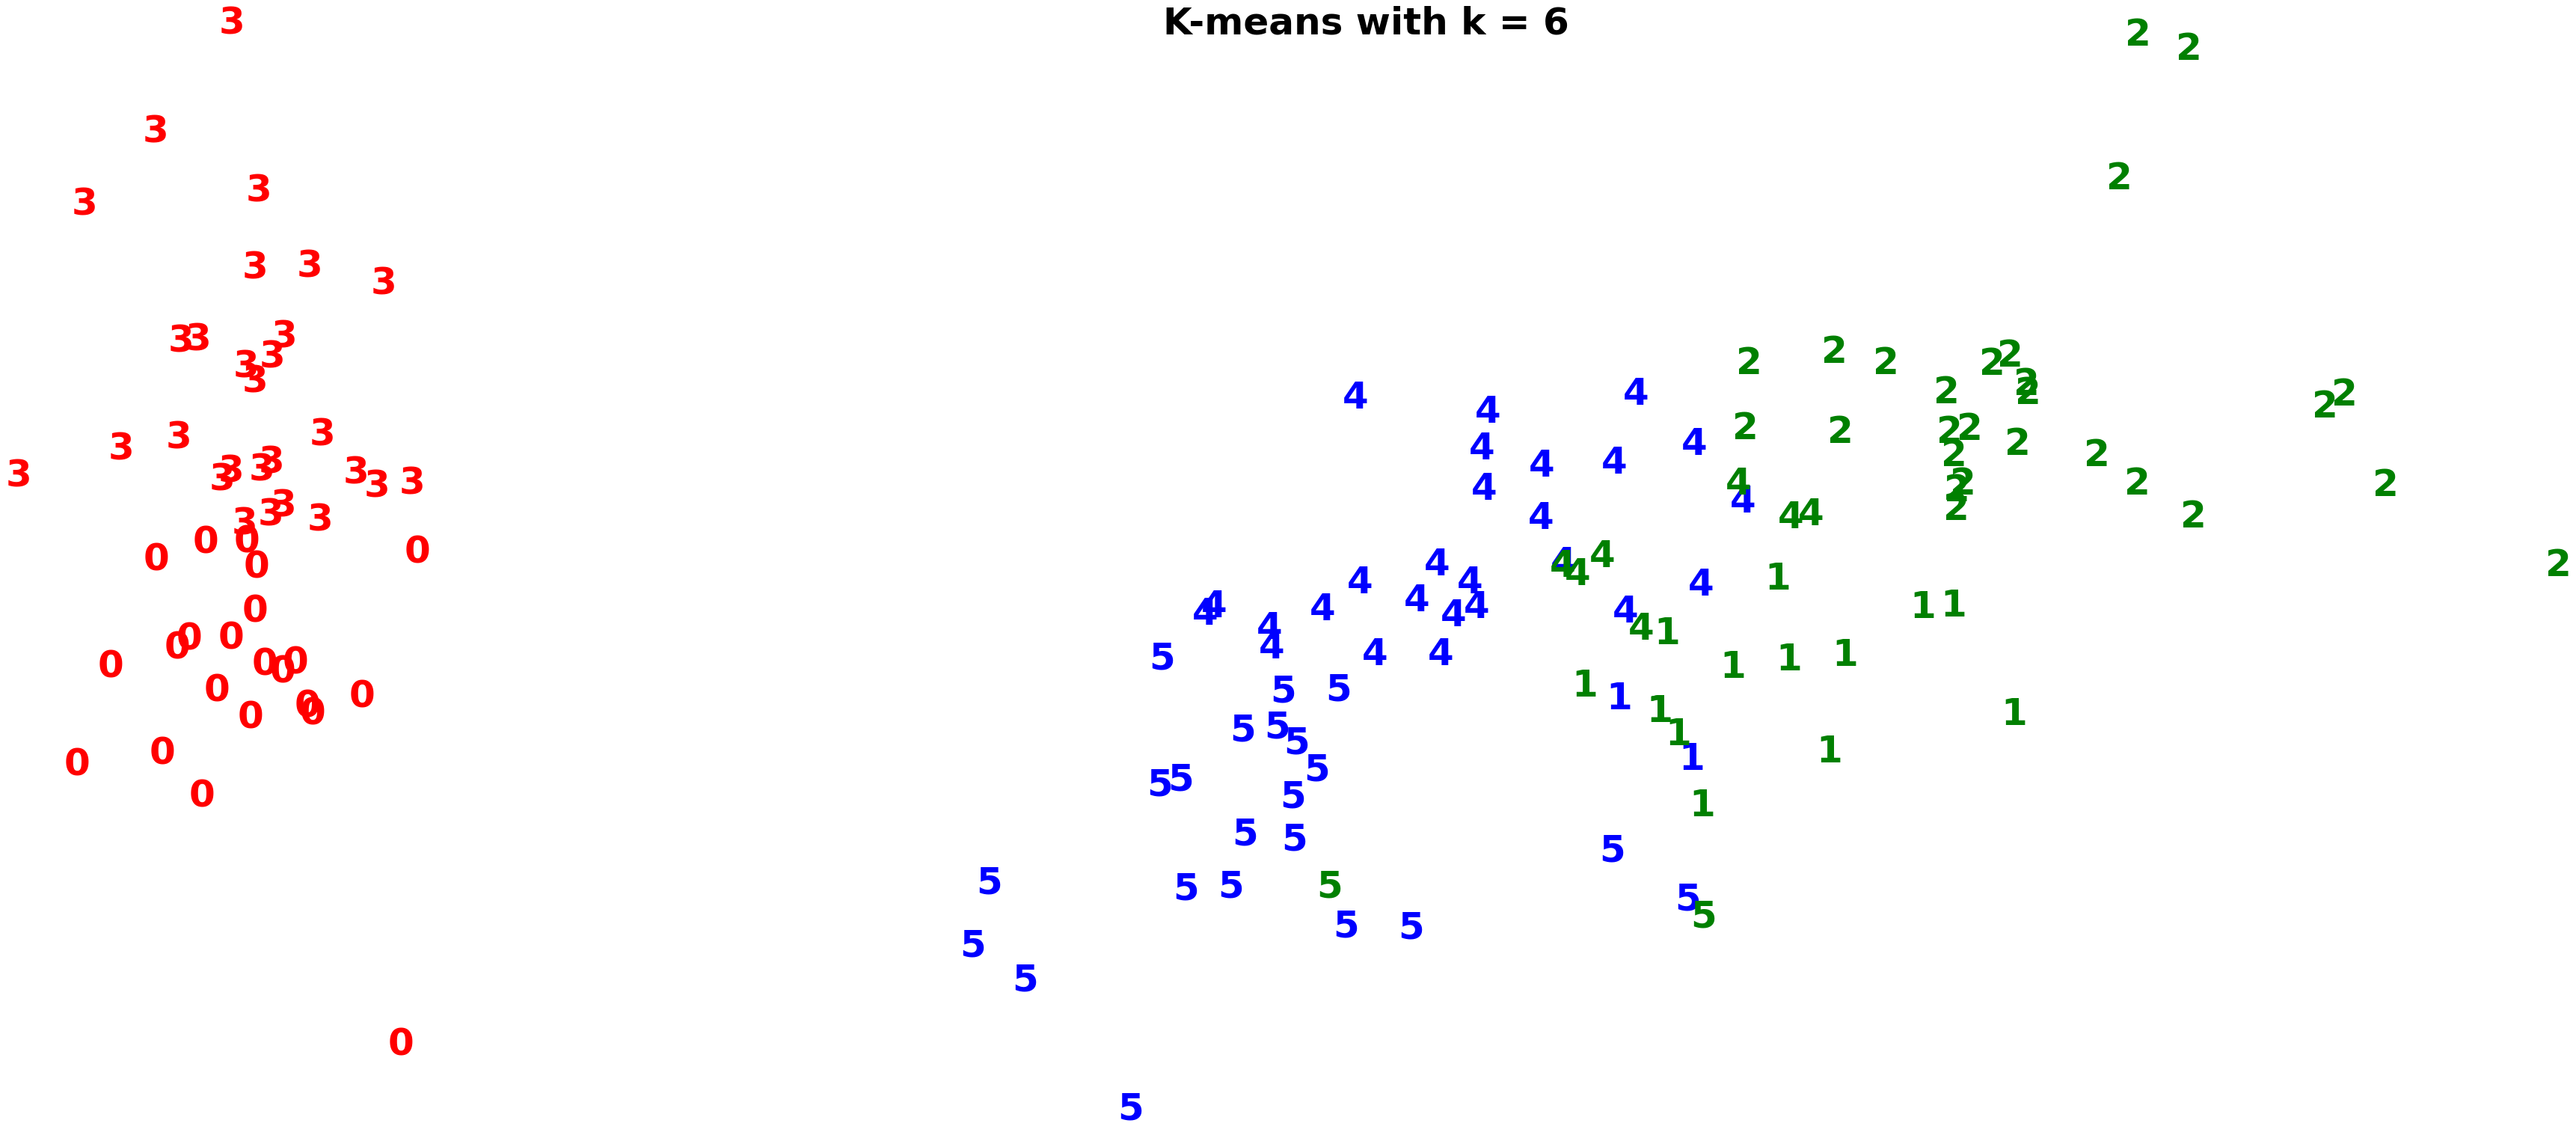

In [4]:
# Visualize each k-means solution:
pca = PCA(n_components = 2).fit_transform(X_std)

colors = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize = (10, 5))
    plt.text(np.mean(pca[:, 0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
            fontdict = {'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                color = colors[y[i]],
                fontdict = {'weight': 'bold', 'size': 50})
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

Among the solutions, only the ones with k is equal to 2 and 3 assign a single cluster to the linearly separable class at the left most part of the figures. The others assign more than one class which we don't want for sure. So, k = 2 or k=3 is the only viable ones. However, when k=2, k-means can only assign a single cluster to the linearly non-separable classes where k=3 can assign them to two clusters. Hence, as we might expect, the best solution seems the be the one where k is equal to 3.

# Heart Disease Dataset

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease', con = engine)
engine.dispose()

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

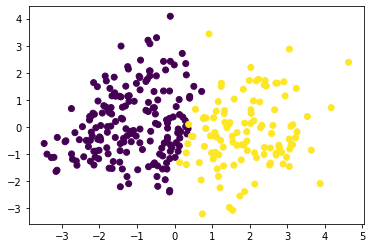

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      151   38
1       13  101


In [6]:
# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X_std)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
# You will learn about cross-tabs/contingency
# tables in the next checkpoint
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))